# **Data Cleaning**

In [1]:
# CAGRI CAN SARACAYDIN 30984
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from os.path import join  # merging paths in a better way
data_path = "/content/gdrive/My Drive/cs210/Project"
# Create a DataFrame for each CSV file
filename = "world_gdp_data.csv"
df_world_gdp = pd.read_csv(join(data_path, 'world_gdp_data.csv'), delimiter=",", encoding='ISO-8859-1')

filename = "Stock Market Dataset.csv"
df_stock_market = pd.read_csv(join(data_path, filename), delimiter=",")

filename = "peace_index.csv"
df_peace_index = pd.read_csv(join(data_path, filename), delimiter=";")

filename = "OECD-InterestRate.csv"
df_interest_rate = pd.read_csv(join(data_path, filename), delimiter=",")

filename = "global_inflation_data.csv"
df_inflation = pd.read_csv(join(data_path, filename), delimiter=",")

filename = "electricity_dah_prices.csv"
df_electricity_prices = pd.read_csv(join(data_path, filename), delimiter=",")

filename = "EURUSD=X.csv"
df_exchange_rate = pd.read_csv(join(data_path, filename), delimiter=",")

Mounted at /content/gdrive


In [2]:
# Display the first few rows of each DataFrame to understand their structure
print("World GDP Data Head:")
print(df_world_gdp.head())

print("\nStock Market Dataset Head:")
print(df_stock_market.head())

print("\nPeace Index Data Head:")
print(df_peace_index.head())

print("\nInterest Rate Data Head:")
print(df_interest_rate.head())

print("\nGlobal Inflation Data Head:")
print(df_inflation.head())

print("\nElectricity Day Ahead Prices Data Head:")
print(df_electricity_prices.head())

print("\nExchange Rate Data Head:")
print(df_exchange_rate.head())


World GDP Data Head:
  country_name                      indicator_name  1980  1981  1982  1983  \
0  Afghanistan  Annual GDP growth (percent change)   NaN   NaN   NaN   NaN   
1      Albania  Annual GDP growth (percent change)   2.7   5.7   2.9   1.1   
2      Algeria  Annual GDP growth (percent change)  -5.4   3.0   6.4   5.4   
3      Andorra  Annual GDP growth (percent change)   NaN   NaN   NaN   NaN   
4       Angola  Annual GDP growth (percent change)   2.4  -4.4   0.0   4.2   

   1984  1985  1986  1987  ...  2015  2016  2017  2018  2019  2020  2021  \
0   NaN   NaN   NaN   NaN  ...   1.0   2.2   2.6   1.2   3.9  -2.4 -20.7   
1   2.0  -1.5   5.6  -0.8  ...   2.2   3.3   3.8   4.0   2.1  -3.3   8.9   
2   5.6   5.6  -0.2  -0.7  ...   3.7   3.2   1.4   1.2   1.0  -5.1   3.4   
3   NaN   NaN   NaN   NaN  ...   1.4   3.7   0.3   1.6   2.0 -11.2   8.3   
4   6.0   3.5   2.9   4.1  ...   0.9  -2.6  -0.2  -1.3  -0.7  -5.6   1.2   

   2022  2023  2024  
0   NaN   NaN   NaN  
1   4.8  

In [3]:

# Only the commodities and Cryptos
relevant_columns = ['Date', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price',
                    'Silver_Price', 'Gold_Price', 'Bitcoin_Price', 'Ethereum_Price']
df_stock_filtered = df_stock_market[relevant_columns].copy()


df_stock_filtered.loc[:, 'Date'] = pd.to_datetime(df_stock_filtered['Date'], format='%d-%m-%Y')
# Replacing commas and convert columns to numeric
df_stock_filtered.loc[:, 'Bitcoin_Price'] = pd.to_numeric(df_stock_filtered['Bitcoin_Price'].str.replace(',', ''), errors='coerce')
df_stock_filtered.loc[:, 'Ethereum_Price'] = pd.to_numeric(df_stock_filtered['Ethereum_Price'].str.replace(',', ''), errors='coerce')
df_stock_filtered.loc[:, 'Gold_Price'] = pd.to_numeric(df_stock_filtered['Gold_Price'].str.replace(',', ''), errors='coerce')

print(df_stock_filtered[['Date', 'Bitcoin_Price', 'Ethereum_Price', 'Gold_Price']].head())


cols_to_convert = ['Bitcoin_Price', 'Ethereum_Price', 'Platinum_Price', 'Gold_Price']
df_stock_filtered.loc[:, cols_to_convert] = df_stock_filtered[cols_to_convert].apply(pd.to_numeric, errors='coerce')


                  Date Bitcoin_Price Ethereum_Price Gold_Price
0  2024-02-02 00:00:00       43194.7        2309.28     2053.7
1  2024-02-01 00:00:00       43081.4        2304.28     2071.1
2  2024-01-31 00:00:00       42580.5        2283.14     2067.4
3  2024-01-30 00:00:00       42946.2        2343.11     2050.9
4  2024-01-29 00:00:00       43299.8        2317.79     2034.9


In [4]:
def convert_to_numeric(df, column_name):
    """Converts a column in a DataFrame to numeric, handling errors."""
    try:
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    except Exception as e:
        print(f"Error converting column '{column_name}': {e}")

numeric_columns = ['Platinum_Price', 'Gold_Price', 'Bitcoin_Price', 'Ethereum_Price']
for col in numeric_columns:
    convert_to_numeric(df_stock_filtered, col)

print(df_stock_filtered.dtypes)


Date                  object
Natural_Gas_Price    float64
Crude_oil_Price      float64
Copper_Price         float64
Platinum_Price       float64
Silver_Price         float64
Gold_Price           float64
Bitcoin_Price        float64
Ethereum_Price       float64
dtype: object


In [5]:
df_stock_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1243 non-null   object 
 1   Natural_Gas_Price  1243 non-null   float64
 2   Crude_oil_Price    1243 non-null   float64
 3   Copper_Price       1243 non-null   float64
 4   Platinum_Price     865 non-null    float64
 5   Silver_Price       1243 non-null   float64
 6   Gold_Price         1243 non-null   float64
 7   Bitcoin_Price      1243 non-null   float64
 8   Ethereum_Price     1243 non-null   float64
dtypes: float64(8), object(1)
memory usage: 87.5+ KB


In [6]:
df_stock_filtered.describe()

,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price,Bitcoin_Price,Ethereum_Price
count,1243.000000,1243.000000,1243.000000,865.000000,1243.000000,1243.000000,1243.000000,1243.000000
mean,3.494714,67.577064,3.541957,902.847225,21.588977,1759.246742,25241.903057,1445.815133
std,1.822540,20.465500,0.702819,62.939769,3.859288,203.258901,16029.009055,1160.674814
min,1.482000,-37.630000,2.100500,595.200000,11.772000,1272.000000,3397.700000,104.550000
25%,2.347500,55.095000,2.858750,864.050000,17.998500,1669.600000,10014.600000,244.080000
50%,2.702000,69.230000,3.666000,909.900000,22.758000,1804.200000,23055.100000,1552.600000
75%,4.055500,80.455000,4.137250,949.550000,24.512000,1912.800000,37784.200000,2056.555000
max,9.647000,123.700000,4.937500,999.800000,29.418000,2089.700000,67527.900000,4808.380000


In [7]:
# filling with Median of Platinum
platinum_median = df_stock_filtered['Platinum_Price'].median()
df_stock_filtered['Platinum_Price'].fillna(platinum_median, inplace=True)

In [8]:
df_stock_filtered.head()

,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price,Bitcoin_Price,Ethereum_Price
0,2024-02-02 00:00:00,2.079,72.28,3.8215,901.6,22.796,2053.7,43194.7,2309.28
1,2024-02-01 00:00:00,2.050,73.82,3.8535,922.3,23.236,2071.1,43081.4,2304.28
2,2024-01-31 00:00:00,2.100,75.85,3.9060,932.6,23.169,2067.4,42580.5,2283.14
3,2024-01-30 00:00:00,2.077,77.82,3.9110,931.7,23.225,2050.9,42946.2,2343.11
4,2024-01-29 00:00:00,2.490,76.78,3.8790,938.3,23.134,2034.9,43299.8,2317.79


In [9]:
df_exchange_rate_filtered = df_exchange_rate[['Date', 'Close', 'High', 'Low']].copy()

df_exchange_rate_filtered.loc[:, 'Date'] = pd.to_datetime(df_exchange_rate_filtered['Date'])

df_exchange_rate_filtered.head()

,Date,Close,High,Low
0,2019-02-01 00:00:00,1.144951,1.148844,1.143511
1,2019-02-04 00:00:00,1.145528,1.146263,1.142544
2,2019-02-05 00:00:00,1.143628,1.144296,1.140329
3,2019-02-06 00:00:00,1.140993,1.141097,1.137540
4,2019-02-07 00:00:00,1.136596,1.137010,1.132605


In [10]:
min_common_date = max(df_exchange_rate_filtered['Date'].min(), df_stock_filtered['Date'].min())
max_common_date = min(df_exchange_rate_filtered['Date'].max(), df_stock_filtered['Date'].max())

print("Common date range:", min_common_date, "to", max_common_date)

df_exchange_rate_common = df_exchange_rate_filtered[(df_exchange_rate_filtered['Date'] >= min_common_date) & (df_exchange_rate_filtered['Date'] <= max_common_date)]
df_stock_market_common = df_stock_filtered[(df_stock_filtered['Date'] >= min_common_date) & (df_stock_filtered['Date'] <= max_common_date)]
df_exchange_rate_common = df_exchange_rate_common.sort_values('Date')
df_stock_market_common = df_stock_market_common.sort_values('Date')



Common date range: 2019-02-04 00:00:00 to 2024-02-02 00:00:00


In [11]:
df_stock_market_common.head()


,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price,Bitcoin_Price,Ethereum_Price
1242,2019-02-04 00:00:00,2.660,54.56,2.7975,822.50,15.886,1319.3,3462.8,107.90
1241,2019-02-05 00:00:00,2.662,53.66,2.8205,821.35,15.836,1319.2,3468.4,107.37
1240,2019-02-06 00:00:00,2.662,54.01,2.8400,807.10,15.701,1314.4,3404.3,104.63
1239,2019-02-07 00:00:00,2.551,52.64,2.8320,800.80,15.713,1314.2,3397.7,104.55
1238,2019-02-08 00:00:00,2.583,52.72,2.8140,802.20,15.809,1318.5,3661.7,119.23


In [12]:
df_exchange_rate_common.head()

,Date,Close,High,Low
1,2019-02-04 00:00:00,1.145528,1.146263,1.142544
2,2019-02-05 00:00:00,1.143628,1.144296,1.140329
3,2019-02-06 00:00:00,1.140993,1.141097,1.137540
4,2019-02-07 00:00:00,1.136596,1.137010,1.132605
5,2019-02-08 00:00:00,1.133877,1.135100,1.132182


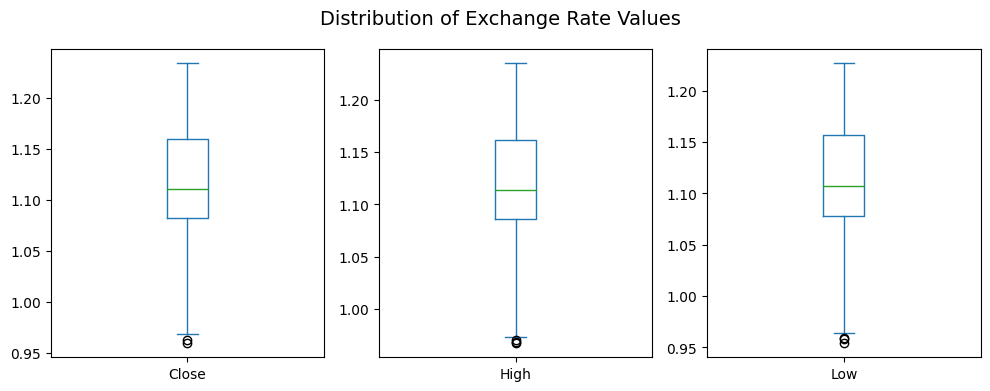

In [13]:
numeric_columns = ['Close', 'High', 'Low']

# box plot
df_exchange_rate_common[numeric_columns].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 4), title="Distribution of Exchange Rate (Close, High, Low)")
plt.suptitle("Distribution of Exchange Rate Values", fontsize=14)
plt.show()

In [14]:
df_exchange_rate_common.describe()

,Close,High,Low
count,1304.000000,1304.000000,1304.000000
mean,1.115181,1.118460,1.111695
std,0.056496,0.055970,0.056933
min,0.959619,0.967006,0.954016
25%,1.082345,1.085635,1.078408
50%,1.110469,1.113487,1.107610
75%,1.159568,1.161180,1.156370
max,1.234111,1.235025,1.226693


In [15]:
df_stock_exchange_combined = pd.merge(df_stock_market_common, df_exchange_rate_common, on='Date', how='inner')
print(df_stock_exchange_combined.head())


                  Date  Natural_Gas_Price  Crude_oil_Price  Copper_Price  \
0  2019-02-04 00:00:00              2.660            54.56        2.7975   
1  2019-02-05 00:00:00              2.662            53.66        2.8205   
2  2019-02-06 00:00:00              2.662            54.01        2.8400   
3  2019-02-07 00:00:00              2.551            52.64        2.8320   
4  2019-02-08 00:00:00              2.583            52.72        2.8140   

   Platinum_Price  Silver_Price  Gold_Price  Bitcoin_Price  Ethereum_Price  \
0          822.50        15.886      1319.3         3462.8          107.90   
1          821.35        15.836      1319.2         3468.4          107.37   
2          807.10        15.701      1314.4         3404.3          104.63   
3          800.80        15.713      1314.2         3397.7          104.55   
4          802.20        15.809      1318.5         3661.7          119.23   

      Close      High       Low  
0  1.145528  1.146263  1.142544  
1  1.1

In [16]:
print(df_stock_exchange_combined.head())
print(df_stock_exchange_combined.dtypes)
cols_to_convert = ['Platinum_Price', 'Gold_Price', 'Bitcoin_Price', 'Ethereum_Price']

                  Date  Natural_Gas_Price  Crude_oil_Price  Copper_Price  \
0  2019-02-04 00:00:00              2.660            54.56        2.7975   
1  2019-02-05 00:00:00              2.662            53.66        2.8205   
2  2019-02-06 00:00:00              2.662            54.01        2.8400   
3  2019-02-07 00:00:00              2.551            52.64        2.8320   
4  2019-02-08 00:00:00              2.583            52.72        2.8140   

   Platinum_Price  Silver_Price  Gold_Price  Bitcoin_Price  Ethereum_Price  \
0          822.50        15.886      1319.3         3462.8          107.90   
1          821.35        15.836      1319.2         3468.4          107.37   
2          807.10        15.701      1314.4         3404.3          104.63   
3          800.80        15.713      1314.2         3397.7          104.55   
4          802.20        15.809      1318.5         3661.7          119.23   

      Close      High       Low  
0  1.145528  1.146263  1.142544  
1  1.1

In [17]:
def safe_convert(value):
    if isinstance(value, str):  # Check if the value is a string
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    return value

for col in cols_to_convert:
    df_stock_exchange_combined[col] = df_stock_exchange_combined[col].apply(safe_convert)


In [18]:
print(df_stock_exchange_combined[cols_to_convert].dtypes)
print(df_stock_exchange_combined.tail())


Platinum_Price    float64
Gold_Price        float64
Bitcoin_Price     float64
Ethereum_Price    float64
dtype: object
                     Date  Natural_Gas_Price  Crude_oil_Price  Copper_Price  \
1238  2024-01-29 00:00:00              2.490            76.78        3.8790   
1239  2024-01-30 00:00:00              2.077            77.82        3.9110   
1240  2024-01-31 00:00:00              2.100            75.85        3.9060   
1241  2024-02-01 00:00:00              2.050            73.82        3.8535   
1242  2024-02-02 00:00:00              2.079            72.28        3.8215   

      Platinum_Price  Silver_Price  Gold_Price  Bitcoin_Price  Ethereum_Price  \
1238           938.3        23.134      2034.9        43299.8         2317.79   
1239           931.7        23.225      2050.9        42946.2         2343.11   
1240           932.6        23.169      2067.4        42580.5         2283.14   
1241           922.3        23.236      2071.1        43081.4         2304.28   
12

In [19]:
print(df_stock_exchange_combined.isnull().sum())


Date                 0
Natural_Gas_Price    0
Crude_oil_Price      0
Copper_Price         0
Platinum_Price       0
Silver_Price         0
Gold_Price           0
Bitcoin_Price        0
Ethereum_Price       0
Close                1
High                 1
Low                  1
dtype: int64


In [20]:
# Forward fill or backward fill for single missing entries
df_stock_exchange_combined['Close'].fillna(method='ffill', inplace=True)
df_stock_exchange_combined['High'].fillna(method='ffill', inplace=True)
df_stock_exchange_combined['Low'].fillna(method='ffill', inplace=True)

# For Platinum_Price with more substantial missing data
platinum_median = df_stock_exchange_combined['Platinum_Price'].median()
df_stock_exchange_combined['Platinum_Price'].fillna(platinum_median, inplace=True)


In [21]:
print(df_stock_exchange_combined.isnull().sum())
# Verify the data types and check for any remaining object types in the columns of interest
print(df_stock_exchange_combined[cols_to_convert].dtypes)
print(df_stock_exchange_combined.tail())

Date                 0
Natural_Gas_Price    0
Crude_oil_Price      0
Copper_Price         0
Platinum_Price       0
Silver_Price         0
Gold_Price           0
Bitcoin_Price        0
Ethereum_Price       0
Close                0
High                 0
Low                  0
dtype: int64
Platinum_Price    float64
Gold_Price        float64
Bitcoin_Price     float64
Ethereum_Price    float64
dtype: object
                     Date  Natural_Gas_Price  Crude_oil_Price  Copper_Price  \
1238  2024-01-29 00:00:00              2.490            76.78        3.8790   
1239  2024-01-30 00:00:00              2.077            77.82        3.9110   
1240  2024-01-31 00:00:00              2.100            75.85        3.9060   
1241  2024-02-01 00:00:00              2.050            73.82        3.8535   
1242  2024-02-02 00:00:00              2.079            72.28        3.8215   

      Platinum_Price  Silver_Price  Gold_Price  Bitcoin_Price  Ethereum_Price  \
1238           938.3        23.134   

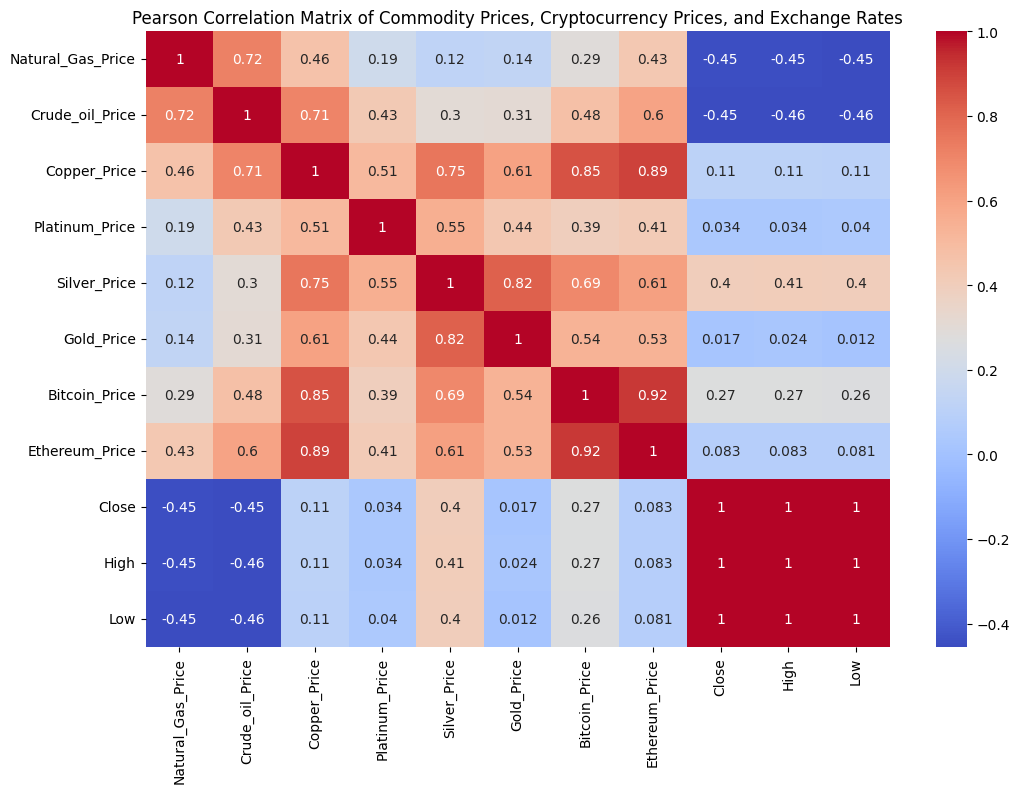

In [22]:
import seaborn as sns

# Select relevant numeric columns
numeric_columns = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price',
                   'Platinum_Price', 'Silver_Price', 'Gold_Price',
                   'Bitcoin_Price', 'Ethereum_Price', 'Close', 'High', 'Low']

# Calculate the correlation matrix using Spearman's rank correlation coefficient
correlation_matrix = df_stock_exchange_combined[numeric_columns].corr(method='pearson')

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Matrix of Commodity Prices, Cryptocurrency Prices, and Exchange Rates")
plt.show()

In [23]:
df_electricity_prices.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67


In [24]:
df_electricity_prices.describe()

,france,italy,belgium,spain,uk,germany
count,8760.000000,8760.000000,8760.000000,8760.000000,7319.000000,8760.000000
mean,275.878425,307.581382,244.531733,167.521917,223.205879,235.446143
std,145.825722,136.959856,134.657307,69.441349,112.921872,142.809409
min,-1.440000,1.000000,-100.000000,0.000000,-30.000000,-19.040000
25%,183.030000,211.875000,157.717500,125.000000,146.000000,134.197500
50%,239.335000,266.645000,219.810000,163.545000,207.980000,208.340000
75%,350.000000,385.000000,315.085000,206.402500,285.210000,310.080000
max,2987.780000,871.000000,871.000000,700.000000,705.470000,871.000000


In [25]:
df_electricity_prices.dtypes

date        object
hour        object
france     float64
italy      float64
belgium    float64
spain      float64
uk         float64
germany    float64
dtype: object

In [26]:
numeric_columns = ['france', 'italy', 'belgium', 'spain', 'uk', 'germany']
df_daily_avg = df_electricity_prices.groupby('date')[numeric_columns].mean().reset_index()

print(df_daily_avg.head())
uk_median = df_daily_avg['uk'].median()

# Fill missing values with the median
df_daily_avg['uk'].fillna(uk_median, inplace=True)


         date      france       italy     belgium       spain          uk  \
0  2022/01/01   87.080833  150.689167   85.675000  122.629167   68.842500   
1  2022/01/02   49.116250  166.910000   50.619583  136.968333   58.329167   
2  2022/01/03   92.122083  192.664167   79.404167  150.498333   86.688750   
3  2022/01/04  156.298333  165.726667  156.280000  152.145417  181.072917   
4  2022/01/05  185.556667  192.537917  155.747917  180.200000  234.993750   

      germany  
0   82.578333  
1   47.353750  
2   76.107083  
3  153.916667  
4  107.868333  


In [27]:
# Calculate the mean across countries for each day to represent the European average
df_daily_avg['european_avg'] = df_daily_avg[numeric_columns].mean(axis=1)

# Check the updated DataFrame with the European average
print(df_daily_avg.head())


         date      france       italy     belgium       spain          uk  \
0  2022/01/01   87.080833  150.689167   85.675000  122.629167   68.842500   
1  2022/01/02   49.116250  166.910000   50.619583  136.968333   58.329167   
2  2022/01/03   92.122083  192.664167   79.404167  150.498333   86.688750   
3  2022/01/04  156.298333  165.726667  156.280000  152.145417  181.072917   
4  2022/01/05  185.556667  192.537917  155.747917  180.200000  234.993750   

      germany  european_avg  
0   82.578333     99.582500  
1   47.353750     84.882847  
2   76.107083    112.914097  
3  153.916667    160.906667  
4  107.868333    176.150764  


In [28]:
df_daily_avg.describe()

,france,italy,belgium,spain,uk,germany,european_avg
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,275.888807,307.592209,244.541321,167.531483,220.995926,235.455737,242.000914
std,130.431942,126.585294,118.888952,62.248768,91.290140,128.365812,95.951959
min,4.377083,100.101667,5.756667,2.653750,34.763750,-0.792083,60.367361
25%,191.420833,215.463750,165.732500,131.312917,160.828333,145.222500,176.995625
50%,237.204167,258.153750,218.169167,159.923333,209.725417,209.190000,222.475069
75%,362.062917,386.459583,324.597083,202.990417,257.696667,317.792917,302.311806
max,743.843333,751.286667,700.412917,544.983750,554.387083,699.441667,593.423056


In [29]:
df_daily_avg.head()

,date,france,italy,belgium,spain,uk,germany,european_avg
0,2022/01/01,87.080833,150.689167,85.675000,122.629167,68.842500,82.578333,99.582500
1,2022/01/02,49.116250,166.910000,50.619583,136.968333,58.329167,47.353750,84.882847
2,2022/01/03,92.122083,192.664167,79.404167,150.498333,86.688750,76.107083,112.914097
3,2022/01/04,156.298333,165.726667,156.280000,152.145417,181.072917,153.916667,160.906667
4,2022/01/05,185.556667,192.537917,155.747917,180.200000,234.993750,107.868333,176.150764


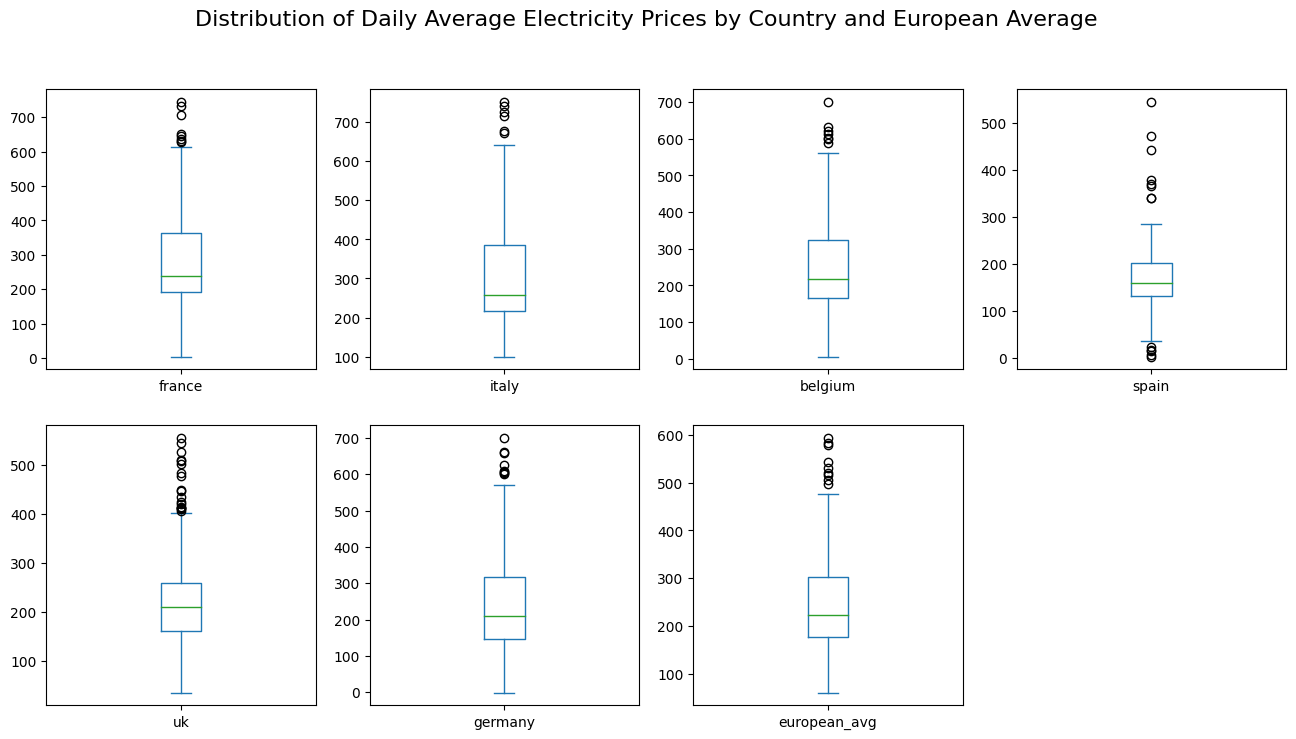

In [30]:
numeric_columns = ['france', 'italy', 'belgium', 'spain', 'uk', 'germany', 'european_avg']

# box plot
df_daily_avg[numeric_columns].plot(kind='box', subplots=True, layout=(2, 4), figsize=(16, 8), title="Distribution of Daily Average Electricity Prices")
plt.suptitle("Distribution of Daily Average Electricity Prices by Country and European Average", fontsize=16)
plt.show()

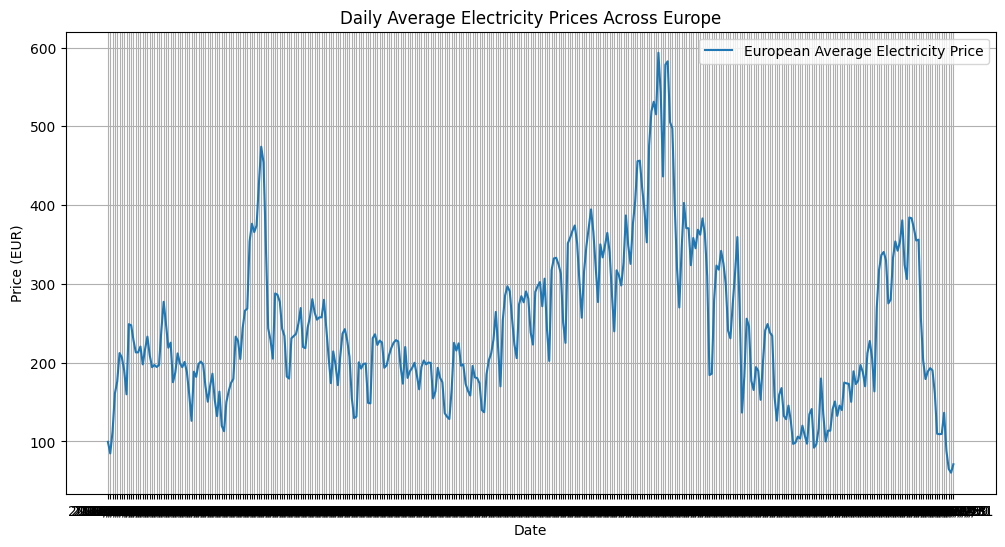

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df_daily_avg['date'], df_daily_avg['european_avg'], label='European Average Electricity Price')
plt.title('Daily Average Electricity Prices Across Europe')
plt.xlabel('Date')
plt.ylabel('Price (EUR)')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
print(df_daily_avg.isnull().sum())


date            0
france          0
italy           0
belgium         0
spain           0
uk              0
germany         0
european_avg    0
dtype: int64


# **Descriptive Data**

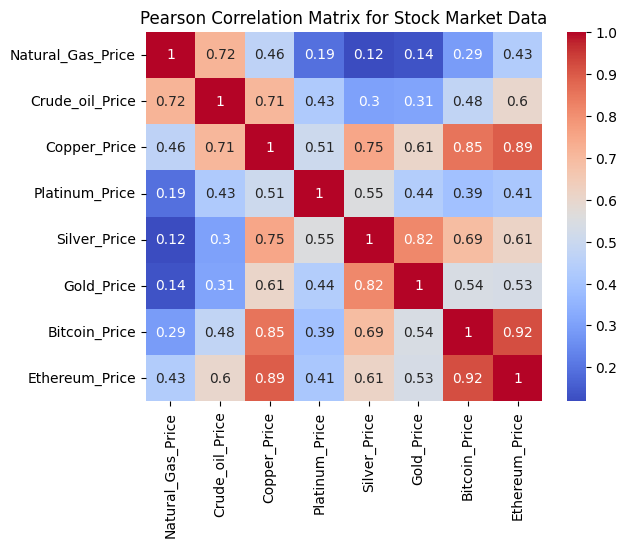

In [33]:
stock_correlation = df_stock_filtered.select_dtypes(include=[np.number]).corr(method='pearson')
sns.heatmap(stock_correlation, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix for Stock Market Data')
plt.show()


In [34]:
df_stock_filtered.head()

,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price,Bitcoin_Price,Ethereum_Price
0,2024-02-02 00:00:00,2.079,72.28,3.8215,901.6,22.796,2053.7,43194.7,2309.28
1,2024-02-01 00:00:00,2.050,73.82,3.8535,922.3,23.236,2071.1,43081.4,2304.28
2,2024-01-31 00:00:00,2.100,75.85,3.9060,932.6,23.169,2067.4,42580.5,2283.14
3,2024-01-30 00:00:00,2.077,77.82,3.9110,931.7,23.225,2050.9,42946.2,2343.11
4,2024-01-29 00:00:00,2.490,76.78,3.8790,938.3,23.134,2034.9,43299.8,2317.79


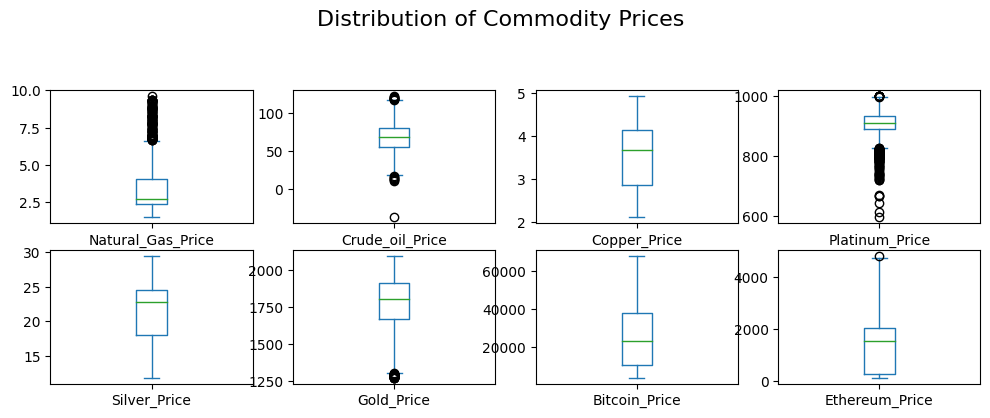

In [35]:
numeric_columns = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Silver_Price', 'Gold_Price', 'Bitcoin_Price', 'Ethereum_Price']

# Create box plot
df_stock_filtered[numeric_columns].plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 8), title="Distribution of Commodity Prices")
plt.suptitle("Distribution of Commodity Prices", fontsize=16)
plt.show()

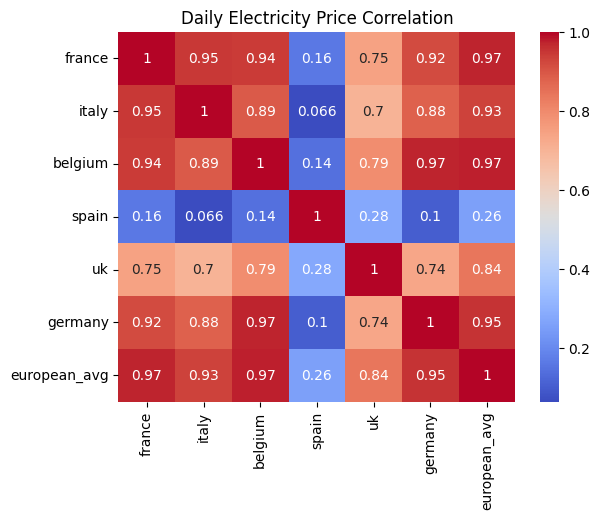

In [36]:
electricity_correlation = df_daily_avg.iloc[:, 1:].corr(method='pearson')
sns.heatmap(electricity_correlation, annot=True, cmap='coolwarm')
plt.title('Daily Electricity Price Correlation')
plt.show()


In [37]:
df_daily_avg.head()

,date,france,italy,belgium,spain,uk,germany,european_avg
0,2022/01/01,87.080833,150.689167,85.675000,122.629167,68.842500,82.578333,99.582500
1,2022/01/02,49.116250,166.910000,50.619583,136.968333,58.329167,47.353750,84.882847
2,2022/01/03,92.122083,192.664167,79.404167,150.498333,86.688750,76.107083,112.914097
3,2022/01/04,156.298333,165.726667,156.280000,152.145417,181.072917,153.916667,160.906667
4,2022/01/05,185.556667,192.537917,155.747917,180.200000,234.993750,107.868333,176.150764


In [38]:
df_stock_filtered.tail()

,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price,Bitcoin_Price,Ethereum_Price
1238,2019-02-08 00:00:00,2.583,52.72,2.8140,802.20,15.809,1318.5,3661.7,119.23
1239,2019-02-07 00:00:00,2.551,52.64,2.8320,800.80,15.713,1314.2,3397.7,104.55
1240,2019-02-06 00:00:00,2.662,54.01,2.8400,807.10,15.701,1314.4,3404.3,104.63
1241,2019-02-05 00:00:00,2.662,53.66,2.8205,821.35,15.836,1319.2,3468.4,107.37
1242,2019-02-04 00:00:00,2.660,54.56,2.7975,822.50,15.886,1319.3,3462.8,107.90


In [39]:
# Convert date columns to datetime type
df_daily_avg['date'] = pd.to_datetime(df_daily_avg['date'])
df_stock_filtered['Date'] = pd.to_datetime(df_stock_filtered['Date'])

# Sort df_stock_filtered by 'Date' in ascending order
df_stock_filtered = df_stock_filtered.sort_values(by='Date')

df_stock_filtered = df_stock_filtered[df_stock_filtered['Date'].dt.year == 2022].copy()

# Merge datasets on the date field using the appropriate column names
df_merged = pd.merge(df_daily_avg[['date', 'european_avg']],
                     df_stock_filtered[['Date', 'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price', 'Silver_Price', 'Gold_Price']],
                     left_on='date', right_on='Date', how='inner')

In [40]:
df_merged = df_merged.drop('Date', axis=1)


In [41]:
df_merged.head()

,date,european_avg,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price
0,2022-01-03,112.914097,3.815,76.08,4.4215,954.0,22.810,1800.1
1,2022-01-04,160.906667,3.717,76.99,4.4750,971.2,23.056,1814.6
2,2022-01-05,176.150764,3.882,77.85,4.4135,909.9,23.170,1825.1
3,2022-01-06,212.191736,3.812,79.46,4.3545,960.7,22.190,1789.2
4,2022-01-07,206.527708,3.916,78.90,4.4100,956.5,22.409,1797.4


In [42]:
df_daily_avg.head()

,date,france,italy,belgium,spain,uk,germany,european_avg
0,2022-01-01,87.080833,150.689167,85.675000,122.629167,68.842500,82.578333,99.582500
1,2022-01-02,49.116250,166.910000,50.619583,136.968333,58.329167,47.353750,84.882847
2,2022-01-03,92.122083,192.664167,79.404167,150.498333,86.688750,76.107083,112.914097
3,2022-01-04,156.298333,165.726667,156.280000,152.145417,181.072917,153.916667,160.906667
4,2022-01-05,185.556667,192.537917,155.747917,180.200000,234.993750,107.868333,176.150764


In [43]:
df_stock_filtered.head()

,Date,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price,Bitcoin_Price,Ethereum_Price
517,2022-01-03,3.815,76.08,4.4215,954.0,22.810,1800.1,46430.2,3764.24
516,2022-01-04,3.717,76.99,4.4750,971.2,23.056,1814.6,45837.3,3789.52
515,2022-01-05,3.882,77.85,4.4135,909.9,23.170,1825.1,43425.9,3535.86
514,2022-01-06,3.812,79.46,4.3545,960.7,22.190,1789.2,43097.5,3407.77
513,2022-01-07,3.916,78.90,4.4100,956.5,22.409,1797.4,41546.7,3195.31


In [44]:
df_merged.head()

,date,european_avg,Natural_Gas_Price,Crude_oil_Price,Copper_Price,Platinum_Price,Silver_Price,Gold_Price
0,2022-01-03,112.914097,3.815,76.08,4.4215,954.0,22.810,1800.1
1,2022-01-04,160.906667,3.717,76.99,4.4750,971.2,23.056,1814.6
2,2022-01-05,176.150764,3.882,77.85,4.4135,909.9,23.170,1825.1
3,2022-01-06,212.191736,3.812,79.46,4.3545,960.7,22.190,1789.2
4,2022-01-07,206.527708,3.916,78.90,4.4100,956.5,22.409,1797.4


In [45]:
# Calculate Pearson correlation
correlation_coef = df_merged['european_avg'].corr(df_merged['Natural_Gas_Price'])
print(f"Pearson Correlation Coefficient: {correlation_coef}")


Pearson Correlation Coefficient: 0.41908238856214386


In [46]:
from scipy.stats import pearsonr
import numpy as np

electricity_prices = np.array(df_merged['european_avg'])
natural_gas_prices = np.array(df_merged['Natural_Gas_Price'])

# Calculate Pearson correlation and p-value
correlation, p_value = pearsonr(electricity_prices, natural_gas_prices)
print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")


Pearson Correlation: 0.41908238856214347
P-value: 7.71390318671398e-12


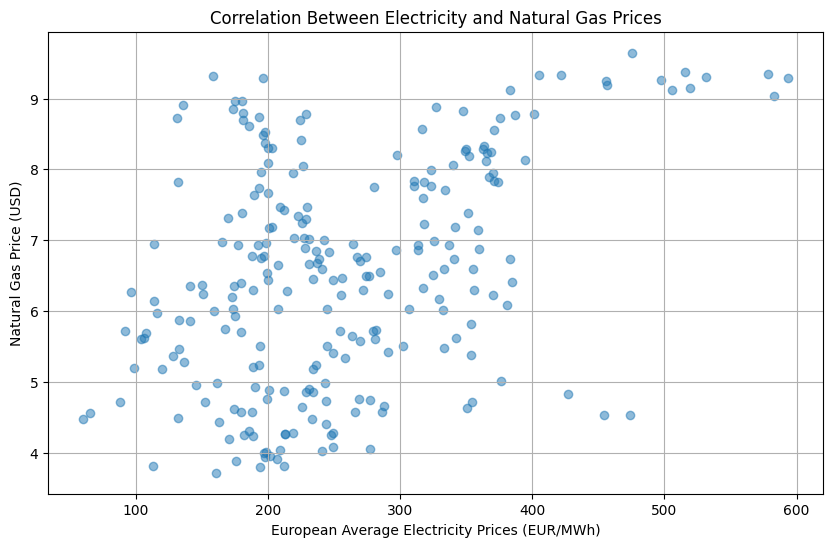

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_merged['european_avg'], df_merged['Natural_Gas_Price'], alpha=0.5)
plt.title('Correlation Between Electricity and Natural Gas Prices')
plt.xlabel('European Average Electricity Prices (EUR/MWh)')
plt.ylabel('Natural Gas Price (USD)')
plt.grid(True)
plt.show()


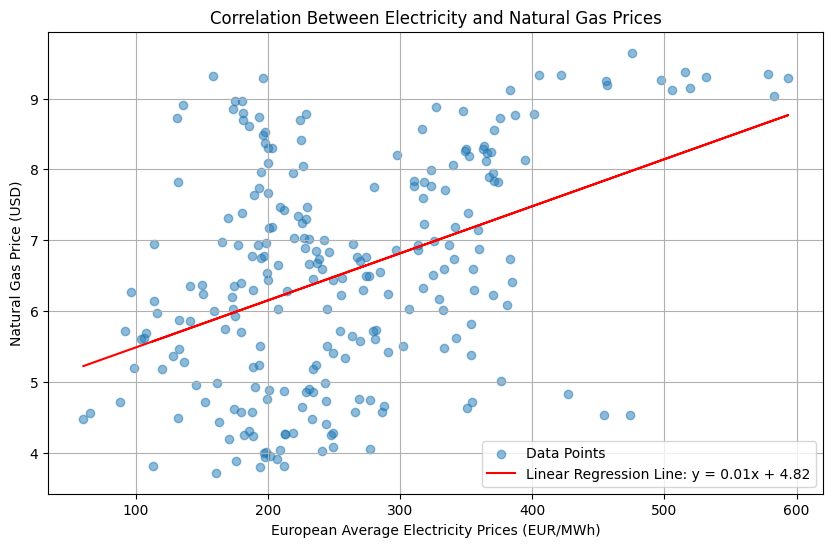

In [48]:
# Data for plotting
x = df_merged['european_avg']  # European average electricity prices
y = df_merged['Natural_Gas_Price']  # Natural gas prices

# Calculate the coefficients for the linear regression line
slope, intercept = np.polyfit(x, y, 1)

# Calculate the values on the regression line
trend_line = slope * x + intercept

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data Points')  # Scatter plot of the data points
plt.plot(x, trend_line, color='red', label=f'Linear Regression Line: y = {slope:.2f}x + {intercept:.2f}')  # Adding the trend line

# Adding plot title, labels and legend
plt.title('Correlation Between Electricity and Natural Gas Prices')
plt.xlabel('European Average Electricity Prices (EUR/MWh)')
plt.ylabel('Natural Gas Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_merged[['european_avg']]  # Feature matrix
y = df_merged['Natural_Gas_Price']  # Target variable

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
# Predicting the Natural Gas Prices using the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error and the R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')



Mean Squared Error: 1.7480785104198
R-squared Score: 0.25933152778916013


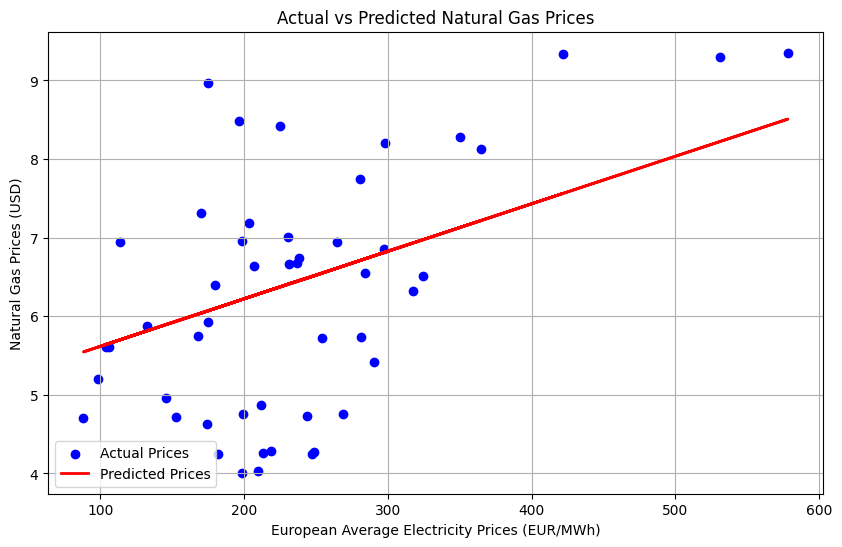

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices', linewidth=2)
plt.title('Actual vs Predicted Natural Gas Prices')
plt.xlabel('European Average Electricity Prices (EUR/MWh)')
plt.ylabel('Natural Gas Prices (USD)')
plt.legend()
plt.grid(True)
plt.show()


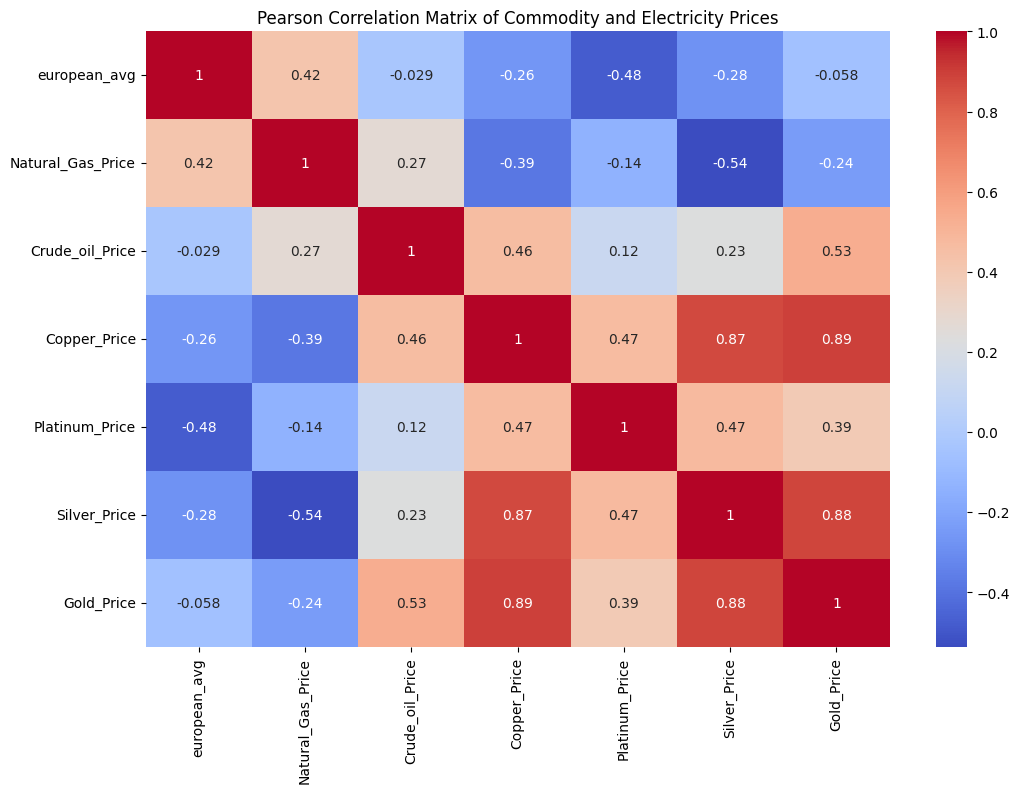

In [51]:
correlation_matrix = df_merged.iloc[:, 1:].corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Matrix of Commodity and Electricity Prices")
plt.show()

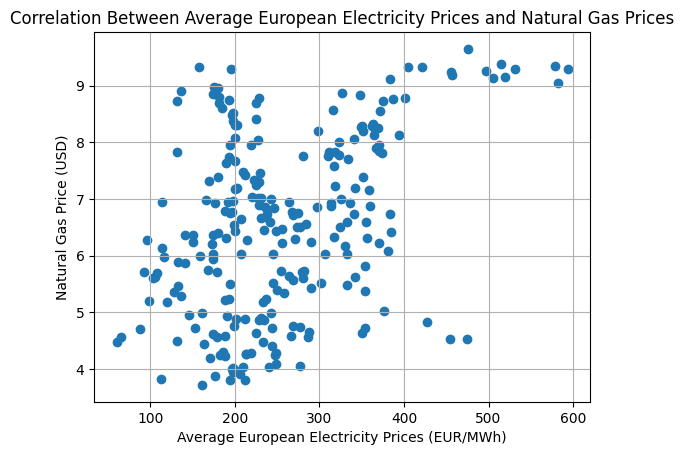

In [52]:
import matplotlib.pyplot as plt

plt.scatter(df_merged['european_avg'], df_merged['Natural_Gas_Price'])
plt.title('Correlation Between Average European Electricity Prices and Natural Gas Prices')
plt.xlabel('Average European Electricity Prices (EUR/MWh)')
plt.ylabel('Natural Gas Price (USD)')
plt.grid(True)
plt.show()


In [53]:
# Extracting the data
x = df_merged['european_avg']
y = df_merged['Natural_Gas_Price']

# Calculating the coefficients of the linear regression
slope, intercept = np.polyfit(x, y, 1)

# Using the slope and intercept to get the values of y based on x for the line
trendline = slope * x + intercept


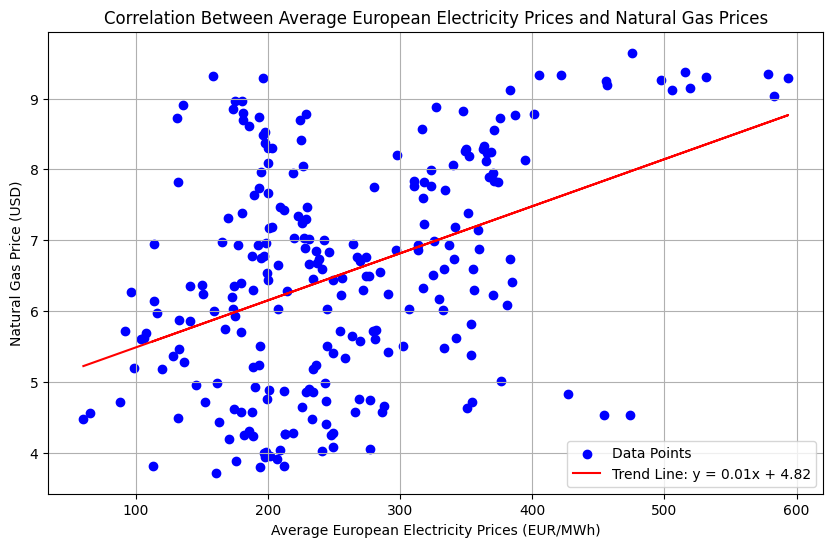

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, trendline, color='red', label=f'Trend Line: y = {slope:.2f}x + {intercept:.2f}')

plt.title('Correlation Between Average European Electricity Prices and Natural Gas Prices')
plt.xlabel('Average European Electricity Prices (EUR/MWh)')
plt.ylabel('Natural Gas Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
